In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [5]:
# This notebook generates some random, lumpy gaussian-mixture data,
# finds the Bayes decision boundary between class 1 and class 2 
# and then fits neural networks of varying levels of complexity
# to differentiate between the two classes.

In [6]:
# Generate means for class 1 and class 2
means1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, 0], [0, 1]]), size=10)
means2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, 0], [0, 1]]), size=10)

In [7]:
n_clusters = 10
finestd = 0.2
clusters_1 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [0,1])  
clusters_2 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [1,0])


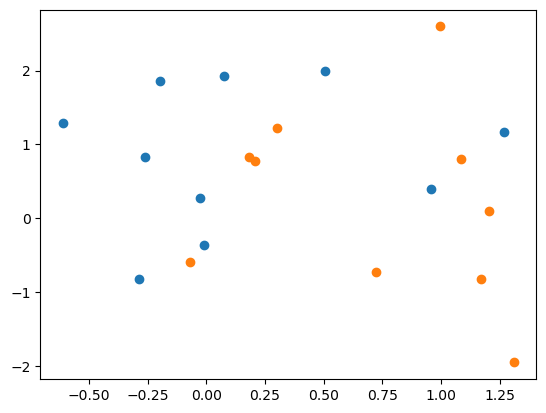

In [8]:
plt.plot(clusters_1[:,0], clusters_1[:,1], 'o')
plt.plot(clusters_2[:,0], clusters_2[:,1], 'o')

In [9]:
def generate_samples(n): 
    index1 = np.random.randint(n_clusters, size=n).astype(int)
    index2 = np.random.randint(n_clusters, size=n).astype(int)
    means1 = clusters_1[index1]
    means2 = clusters_2[index2]
    samples1=np.random.randn (n,2) * finestd + means1
    samples2=np.random.randn (n,2) * finestd + means2
    return(samples1, samples2)

In [10]:
test1, test2 = generate_samples(1000)
train1, train2 = generate_samples(100)

Xtest = np.vstack([test1, test2])
Ytest = np.vstack([np.ones((test1.shape[0],1))*1, np.ones((test2.shape[0],1))*2])


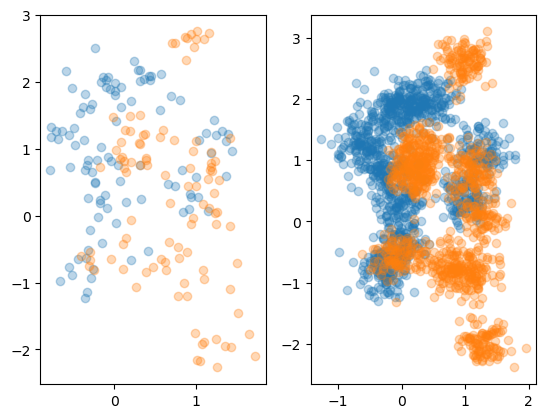

In [11]:
plt.subplot(121)
plt.plot(train1[:,0], train1[:,1], 'o', alpha=0.3)
plt.plot(train2[:,0], train2[:,1], 'o', alpha=0.3)
plt.subplot(122)
plt.plot(test1[:,0], test1[:,1], 'o', alpha=0.3)
plt.plot(test2[:,0], test2[:,1], 'o', alpha=0.3)

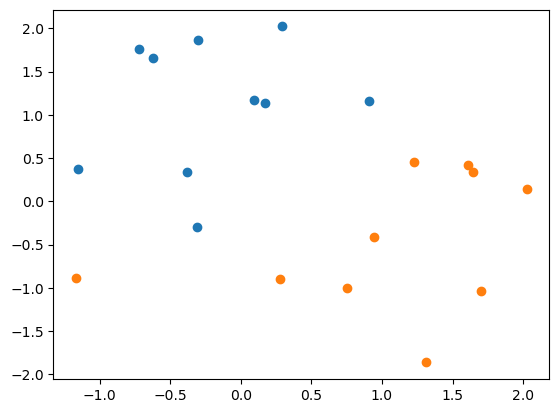

In [12]:
plt.plot(means1[:,0], means1[:,1],'o')
plt.plot(means2[:,0], means2[:,1],'o')


In [13]:
def prob_class1(x):
    print( (scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd) ) )
    print( (scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd ) ) )

    c1 = np.sum( scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd ) ) 
    c2 = np.sum( scipy.stats.norm.pdf(x, loc =clusters_2, scale=finestd) ) 
    return(c1)
    return(c1/(c1+c2))
prob_class1([0,0])

[[8.61929126e-01 4.02029600e-04]
 [3.58307958e-09 7.61846147e-08]
 [1.86626668e-02 2.00014275e-09]
 [1.21826515e+00 2.64269228e-19]
 [1.99177872e+00 3.82978304e-01]
 [7.24291026e-01 4.09083732e-04]
 [1.85194166e+00 1.20883623e-20]
 [1.97614587e+00 8.08518548e-01]
 [2.16274292e-05 2.76825564e-01]
 [8.32065442e-02 6.16318832e-22]]
[[8.61929126e-01 4.02029600e-04]
 [3.58307958e-09 7.61846147e-08]
 [1.86626668e-02 2.00014275e-09]
 [1.21826515e+00 2.64269228e-19]
 [1.99177872e+00 3.82978304e-01]
 [7.24291026e-01 4.09083732e-04]
 [1.85194166e+00 1.20883623e-20]
 [1.97614587e+00 8.08518548e-01]
 [2.16274292e-05 2.76825564e-01]
 [8.32065442e-02 6.16318832e-22]]


10.195375998505083

In [14]:
print(clusters_1.shape, clusters_2.shape)

(10, 2) (10, 2)


In [15]:
def prob_class1(x):
    c1 =0
    c2 = 0
    for i in range(clusters_1.shape[0]):
        c1 = c1 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_1[i,:], cov=np.eye(clusters_1.shape[1]) * finestd )  
    for i in range(clusters_2.shape[0]):
        c2 = c2 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_2[i,:], cov=np.eye(clusters_2.shape[1]) * finestd )  
    #return(c1)
    return(c1/(c1+c2))
prob_class1([0,0])

0.6817998859419896

In [16]:
xgrid = np.linspace(-4,4,110) # range for x1
ygrid = np.linspace(-4,4,100)  # range for x2

xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
       # print(x)
        z[i,j]= prob_class1(x)

(110, 100) (110, 100) (110, 100)


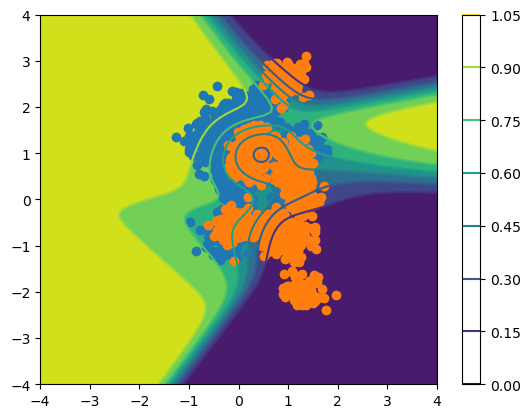

In [17]:
CS = plt.contourf(xax, yax, z) # , levels=[0, 0.25, 0.5, 0.75, 1.0], cmap="seismic")
plt.scatter(test1[:,0], test1[:,1])
plt.scatter(test2[:,0], test2[:,1])
CS = plt.contour(xax, yax, z) 
plt.colorbar(cmap="seismic")


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_57690/3109693896.py:4: UserWarning: The following kwargs were not used by contour: 'color', 'width'
  CS = plt.contour(xax, yax, z, levels= [ 0.5], color="black", width=2)


Text(0.5, 1.0, 'Decision boundary when density is known')

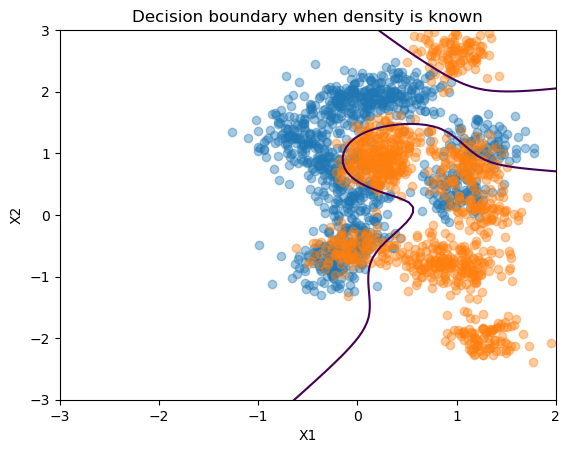

In [18]:
plt.scatter(test1[:,0], test1[:,1], alpha=0.4)
plt.scatter(test2[:,0], test2[:,1], alpha=0.4)
#CS = plt.contour(xax, yax, z, ) 
CS = plt.contour(xax, yax, z, levels= [ 0.5], color="black", width=2) 
plt.xlim(-3,2 )
plt.ylim(-3,3)
plt.xlabel("X1"); plt.ylabel("X2")
plt.title("Decision boundary when density is known")

In [19]:
Xtest.shape

(2000, 2)

In [20]:
prob_test = np.array([ prob_class1(x) for x in Xtest] )
prob_test[0:10]

array([0.63920186, 0.83645399, 0.55031474, 0.67360954, 0.71190909,
       0.64196797, 0.81331837, 0.57347031, 0.79638763, 0.90618517])

In [21]:
prob_test.shape

(2000,)

In [22]:
# Evaluate the number of the testing points that would have been classified
# correctly using the Bayes pick-the-most-likely-category rule.

bayes_error_est = np.sum(np.equal(1 + (prob_test < 0.5), Ytest[:,0])) / len(Ytest)
bayes_error_est

0.8495

In [ ]:
# This term took some fiddling to get right because my categories were 
# 1 and 2.

In [23]:
Ytest

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [24]:
Ytest.shape, Xtest.shape

((2000, 1), (2000, 2))

In [25]:
# assemble the matrices into the right shapes
X   = np.vstack ( [ train1, train2])
Y   = np.vstack ( [ np.ones((train1.shape[0],1)), 
                    np.ones((train2.shape[0],1))*2 ])

In [26]:
X.shape, Y.shape

((200, 2), (200, 1))

In [27]:
from sklearn.linear_model import Perceptron
clf = Perceptron()  # defaults for everything
clf.fit(X, Y)
clf.score(Xtest, Ytest)
perceptronY = clf.predict(Xtest)
clf.score(Xtest, Ytest)

/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6435

In [28]:
# confusion?  
BAYES =  np.array((prob_test < 0.5) ) + np.array(Ytest  * 10).T
unique, counts = np.unique(BAYES, return_counts=True)
unique, counts

(array([10., 11., 20., 21.]), array([846, 154, 147, 853]))

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prob_test<0.5, Ytest)


array([[  0, 846, 147],
       [  0, 154, 853],
       [  0,   0,   0]])

In [30]:
(846+853)/2000

0.8495

In [31]:
confusion_matrix(perceptronY, Ytest)

array([[827, 540],
       [173, 460]])

In [32]:
perceptron_score = clf.score(Xtest, Ytest)
# Okay, perceptron is doing much worse than Bayes, and we know why.
perceptron_score

0.6435

In [33]:
xgrid = np.linspace(-4,4,110) # range for x1
ygrid = np.linspace(-4,4,100)  # range for x2
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
def gridmap(fun):
    z = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z[i,j]= fun(x.reshape((1, -1)))
    return(z)
c={1:"red", 2:"blue"}
def display_grid(z):
    color = [ c[e] for e in z.reshape(-1)]
    plt.scatter(xax, yax, c=color, marker="s", alpha=0.2, s= 110/8)
    plt.plot(train1[:,0], train1[:,1], 'o', alpha=0.7)
    plt.plot(train2[:,0], train2[:,1], 'o', alpha=0.7)


In [34]:
[e for e in z.reshape(-1)][0]


0.999655714103031

In [35]:
perceptron_boundary = gridmap(clf.predict)


(110, 100) (110, 100) (110, 100)


In [36]:
perceptron_boundary

array([[2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       ...,
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.]])

Text(0.5, 1.0, 'Perceptron 0.643')

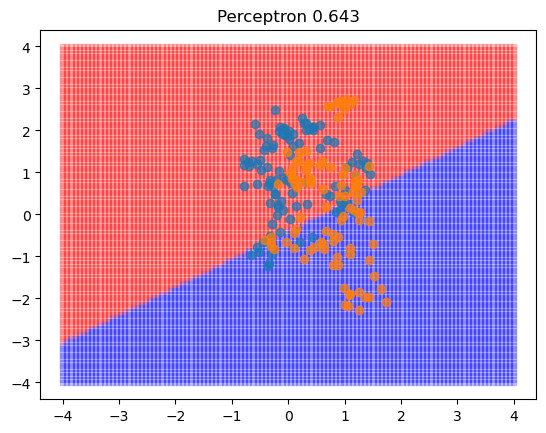

In [37]:
display_grid( perceptron_boundary)
plt.title("Perceptron {:.3f}".format(perceptron_score))


In [38]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier()
mlp1.fit(X, Y)
mlp1_score = mlp1.score(Xtest, Ytest)
mlp1_score

/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.694

In [39]:
mlp1_score

0.694

In [40]:
mlp1_boundary = gridmap(mlp1.predict)


(110, 100) (110, 100) (110, 100)


Text(0.5, 1.0, 'MLP, 1-layer, 0.694')

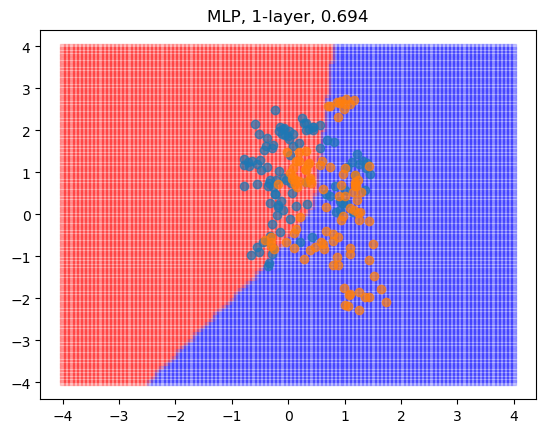

In [41]:
display_grid(mlp1_boundary)
plt.title("MLP, 1-layer, {:.3f}".format(mlp1_score))


In [42]:
# This does not converge well, and when it does
# converge, it seems to have nearly-linear boundaries.
mlp2 = MLPClassifier(hidden_layer_sizes=(4,),max_iter=1000)
mlp2.fit(X, Y)
mlp2_boundary = gridmap(mlp2.predict)

mlp2_score = mlp2.score(Xtest, Ytest)
mlp2_score


/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(110, 100) (110, 100) (110, 100)


0.6645

In [ ]:
# Any thoughts on why this happens with n_hidden = (4) but not with n_hidden=(100)?

Text(0.5, 1.0, 'MLP, 1-layer, 4-node 0.664')

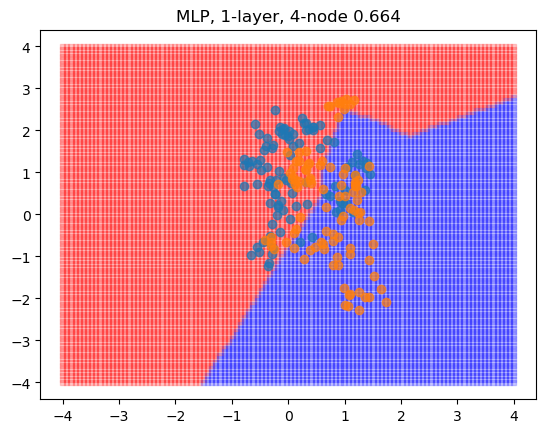

In [43]:
display_grid(mlp2_boundary)
plt.title("MLP, 1-layer, 4-node {:.3f}".format(mlp2_score))


In [46]:
mlp3 = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1200)
mlp3.fit(X, Y)
mlp3_boundary = gridmap(mlp3.predict)

mlp3_score = mlp3.score(Xtest, Ytest)
mlp3_score

/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(


(110, 100) (110, 100) (110, 100)


0.832

Text(0.5, 1.0, 'MLP, 3-layer 0.832')

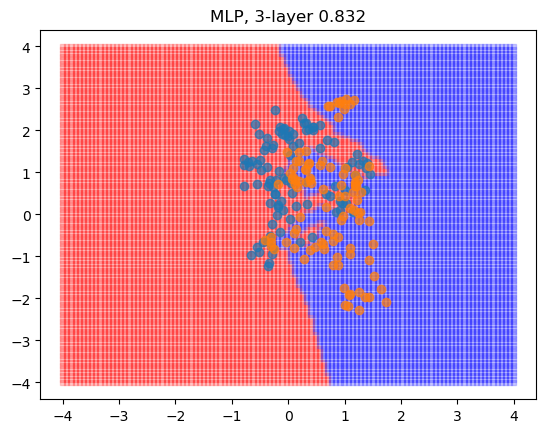

In [47]:
display_grid(mlp3_boundary)
plt.title("MLP, 3-layer {:.3f}".format(mlp3_score))


In [51]:
# This is nice, but I want to see overfitting.  More layers?
mlp4 = MLPClassifier(hidden_layer_sizes=(100,60,30,10, 5), max_iter=500)
mlp4.fit(X, Y)
mlp4_boundary = gridmap(mlp4.predict)
mlp4_score = mlp4.score(Xtest, Ytest)
mlp4_score

/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(110, 100) (110, 100) (110, 100)


0.8315

Text(0.5, 1.0, 'MLP, 3-layer 0.832')

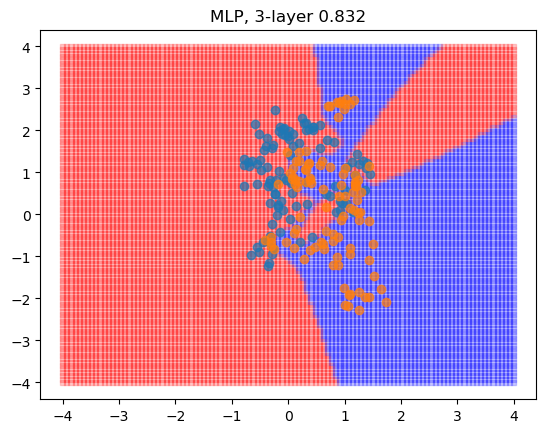

In [52]:
display_grid(mlp4_boundary)
plt.title("MLP, 3-layer {:.3f}".format(mlp4_score))

In [53]:
# This is nice, but I want to see overfitting.  Bigger layers?
mlp5 = MLPClassifier(hidden_layer_sizes=(100,100,60,60, 30))
mlp5.fit(X, Y)
mlp5_boundary = gridmap(mlp5.predict)
mlp5_score = mlp5.score(Xtest, Ytest)
mlp5_score

/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(110, 100) (110, 100) (110, 100)


0.836

Text(0.5, 1.0, 'MLP, 5-layer 0.836')

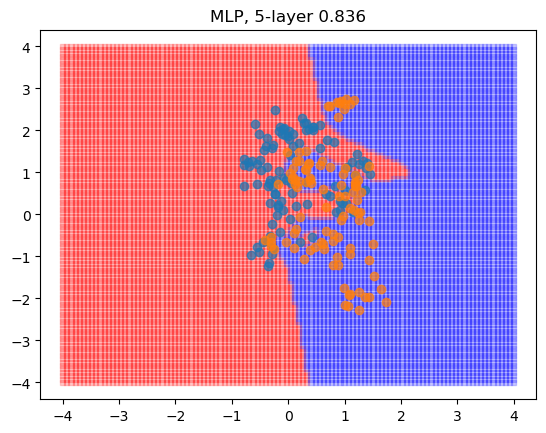

In [54]:
display_grid(mlp5_boundary)
plt.title("MLP, 5-layer {:.3f}".format(mlp5_score))

In [ ]:
print(mlp5.coefs_[0].shape)
plt.hist(mlp5.coefs_[0].reshape((-1)), bins=30)

In [ ]:
plt.hist(mlp5.coefs_[1].reshape((-1)), bins=30)

In [ ]:
plt.hist(mlp5.coefs_[2].reshape((-1)), bins=30)

In [ ]:
plt.hist(mlp5.coefs_[3].reshape((-1)), bins=30)

In [ ]:
plt.hist(mlp5.coefs_[4].reshape((-1)), bins=30)